In [2]:
import boto3
from dotenv import load_dotenv
import os

load_dotenv()


True

In [3]:

s3_client = boto3.client('s3',
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    region_name=os.getenv('AWS_REGION')
)



__Instructions__

* Write the Python code to upload each file. Use a loop to find all `.jpg` files in your local images directory and upload them to the specified S3 path: `TECHCATALYST-RAW/YOURNAME/AI/IMAGES_RAW/`
* You can use either `Boto3` or `awswrangler` for this task.
* Make sure only `.jpg` files are uploaded 

In [4]:
# Configuration
YOUR_NAME = "michael"  # Replace with your actual name
BUCKET_NAME = "techcatalyst-raw"
S3_PREFIX = f"{YOUR_NAME}/AI/IMAGES_RAW/"
LOCAL_IMAGES_DIR = "Images"

# Find and upload all .jpg files
for root, dirs, files in os.walk(LOCAL_IMAGES_DIR):
    for file in files:
        if file.lower().endswith('.jpg'):
            local_file_path = os.path.join(root, file)
            s3_key = f"{S3_PREFIX}{file}"
            
            s3_client.upload_file(local_file_path, BUCKET_NAME, s3_key)
            print(f"Uploaded: {file}")

print("Upload complete!")

Uploaded: 1c62dcbf9a6c22c7.jpg
Uploaded: b541cf545aaca2c4.jpg
Uploaded: f3ecacf903a52827.jpg
Uploaded: 2f6fbf1e163dd7ed.jpg
Uploaded: f484d1b789e6ed63.jpg
Uploaded: f3ecacf903a52827.jpg
Uploaded: 2f6fbf1e163dd7ed.jpg
Uploaded: f484d1b789e6ed63.jpg
Uploaded: 27801b00dbefaa6d.jpg
Uploaded: bd308fea65994fd5.jpg
Uploaded: 2c75228218b9f9c5.jpg
Uploaded: 27801b00dbefaa6d.jpg
Uploaded: bd308fea65994fd5.jpg
Uploaded: 2c75228218b9f9c5.jpg
Uploaded: 3831e7027912e1e2.jpg
Uploaded: 30e5cfb58d3535e5.jpg
Uploaded: 2c57bd6d734b6ff3.jpg
Uploaded: 3831e7027912e1e2.jpg
Uploaded: 30e5cfb58d3535e5.jpg
Uploaded: 2c57bd6d734b6ff3.jpg
Uploaded: b7e7072fc29fd465.jpg
Uploaded: 1c00790f8e592ab2.jpg
Uploaded: b7e7072fc29fd465.jpg
Uploaded: 1c00790f8e592ab2.jpg
Uploaded: be444dbec1531469.jpg
Uploaded: ff1c8c4b3e934834.jpg
Uploaded: be444dbec1531469.jpg
Uploaded: ff1c8c4b3e934834.jpg
Uploaded: 19306e847f2dbe79.jpg
Uploaded: 314a92443055fcb4.jpg
Uploaded: fb2ee89cfe29396a.jpg
Uploaded: 19306e847f2dbe79.jpg
Uploaded

In [7]:
# List uploaded files in S3
response = s3_client.list_objects_v2(Bucket=BUCKET_NAME, Prefix=S3_PREFIX)

rekognition_client = boto3.client('rekognition',
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    region_name=os.getenv('AWS_REGION')
)
for obj in response['Contents']:
    print(obj['Key'])
    


michael/AI/IMAGES_RAW/19306e847f2dbe79.jpg
michael/AI/IMAGES_RAW/1ac5b485b95c9f00.jpg
michael/AI/IMAGES_RAW/1c00790f8e592ab2.jpg
michael/AI/IMAGES_RAW/1c62dcbf9a6c22c7.jpg
michael/AI/IMAGES_RAW/1d5b964bef140076.jpg
michael/AI/IMAGES_RAW/27801b00dbefaa6d.jpg
michael/AI/IMAGES_RAW/29ab3cf353e1f894.jpg
michael/AI/IMAGES_RAW/2c57bd6d734b6ff3.jpg
michael/AI/IMAGES_RAW/2c75228218b9f9c5.jpg
michael/AI/IMAGES_RAW/2f6fbf1e163dd7ed.jpg
michael/AI/IMAGES_RAW/30e5cfb58d3535e5.jpg
michael/AI/IMAGES_RAW/314a92443055fcb4.jpg
michael/AI/IMAGES_RAW/330ac77b36168d85.jpg
michael/AI/IMAGES_RAW/34648969fa39542f.jpg
michael/AI/IMAGES_RAW/365ffe4454fead9f.jpg
michael/AI/IMAGES_RAW/36e1293915bb2033.jpg
michael/AI/IMAGES_RAW/37849965c0121f83.jpg
michael/AI/IMAGES_RAW/379b34acaa12842a.jpg
michael/AI/IMAGES_RAW/37a515312eca1d5a.jpg
michael/AI/IMAGES_RAW/3831e7027912e1e2.jpg
michael/AI/IMAGES_RAW/b039b15d520a07c3.jpg
michael/AI/IMAGES_RAW/b541cf545aaca2c4.jpg
michael/AI/IMAGES_RAW/b7e7072fc29fd465.jpg
michael/AI/

In [8]:
for obj in response['Contents']:
    print(obj['Key'])
    rekognition_client.detect_text(
        Image={'S3Object': {'Bucket': BUCKET_NAME, 'Name': obj['Key']}}
    )


michael/AI/IMAGES_RAW/19306e847f2dbe79.jpg
michael/AI/IMAGES_RAW/1ac5b485b95c9f00.jpg
michael/AI/IMAGES_RAW/1ac5b485b95c9f00.jpg
michael/AI/IMAGES_RAW/1c00790f8e592ab2.jpg
michael/AI/IMAGES_RAW/1c00790f8e592ab2.jpg
michael/AI/IMAGES_RAW/1c62dcbf9a6c22c7.jpg
michael/AI/IMAGES_RAW/1c62dcbf9a6c22c7.jpg
michael/AI/IMAGES_RAW/1d5b964bef140076.jpg
michael/AI/IMAGES_RAW/1d5b964bef140076.jpg
michael/AI/IMAGES_RAW/27801b00dbefaa6d.jpg
michael/AI/IMAGES_RAW/27801b00dbefaa6d.jpg
michael/AI/IMAGES_RAW/29ab3cf353e1f894.jpg
michael/AI/IMAGES_RAW/29ab3cf353e1f894.jpg
michael/AI/IMAGES_RAW/2c57bd6d734b6ff3.jpg
michael/AI/IMAGES_RAW/2c57bd6d734b6ff3.jpg
michael/AI/IMAGES_RAW/2c75228218b9f9c5.jpg
michael/AI/IMAGES_RAW/2c75228218b9f9c5.jpg
michael/AI/IMAGES_RAW/2f6fbf1e163dd7ed.jpg
michael/AI/IMAGES_RAW/2f6fbf1e163dd7ed.jpg
michael/AI/IMAGES_RAW/30e5cfb58d3535e5.jpg
michael/AI/IMAGES_RAW/30e5cfb58d3535e5.jpg
michael/AI/IMAGES_RAW/314a92443055fcb4.jpg
michael/AI/IMAGES_RAW/314a92443055fcb4.jpg
michael/AI/

## Part 3: Store results in S3 as a Parquet File
Raw text files (like CSVs) are good, but columnar formats like Parquet are much more efficient for analytics. They are faster to query and take up less space. We will save our DataFrame as a Parquet file and upload it to a "processed" folder in S3 `TECHCATALYST-RAW/YOURNAME/AI/IMAGES_PROCESSED/`.

* Figure out how you can save the plots (The Bar charts and Pie charts) and have them uploaded as `.jpg` images to the `/IMAGES_PROCESSED/` folder along with the `parquet` file. (YOU CAN SAVE AS CSV OR PARQUET. )

__Instructions__

* Save the output DataFrame as a Parquet file to the new S3 location. DataFrame will contain S3 File path for each image (that’s the image Key), State, and Car Make.
* Create plots (Pie charts and bar charts as shown below) using `DataFrame.plot()` 
  * **Hint**: `DataFrame.value_counts()`
  * Figure out how you can save the plot as a `.jpg`

## Example output

![image-20250805131438819](images/image-20250805131438819.png)

![image-20250805131514425](images/image-20250805131514425.png)

![image-20250805131536034](images/image-20250805131536034.png)

Processing: michael/AI/IMAGES_RAW/19306e847f2dbe79.jpg
Detected text: VA 4164979
Detected text: NOV
Detected text: VIRGINIA
Detected text: VA 6175063
Detected text: 15
Detected text: JEUN INEE PARK
Detected text: JAMES RIVER SYSTEM
Processing: michael/AI/IMAGES_RAW/1ac5b485b95c9f00.jpg
Detected text: MO
Detected text: California
Detected text: YA
Detected text: LAFIAT
Processing: michael/AI/IMAGES_RAW/1c00790f8e592ab2.jpg
Detected text: VA 4713476
Detected text: VA 5278850
Detected text: VIRGINIA
Detected text: 16
Detected text: AUG
Detected text: OPA
Detected text: OPA
Detected text: VIRGINIA IS FOR LOVERS
Detected text: Virginia.org
Processing: michael/AI/IMAGES_RAW/1c62dcbf9a6c22c7.jpg
Detected text: STANFORD UNIVERSITY
Detected text: APR
Detected text: 2013
Detected text: California
Detected text: GOGLGRL
Detected text: STANPORD
Detected text: MESCUR
Detected text: MOUNTAINESS
Processing: michael/AI/IMAGES_RAW/1d5b964bef140076.jpg
Detected text: VA 4304826
Detected text: JUN
Detect

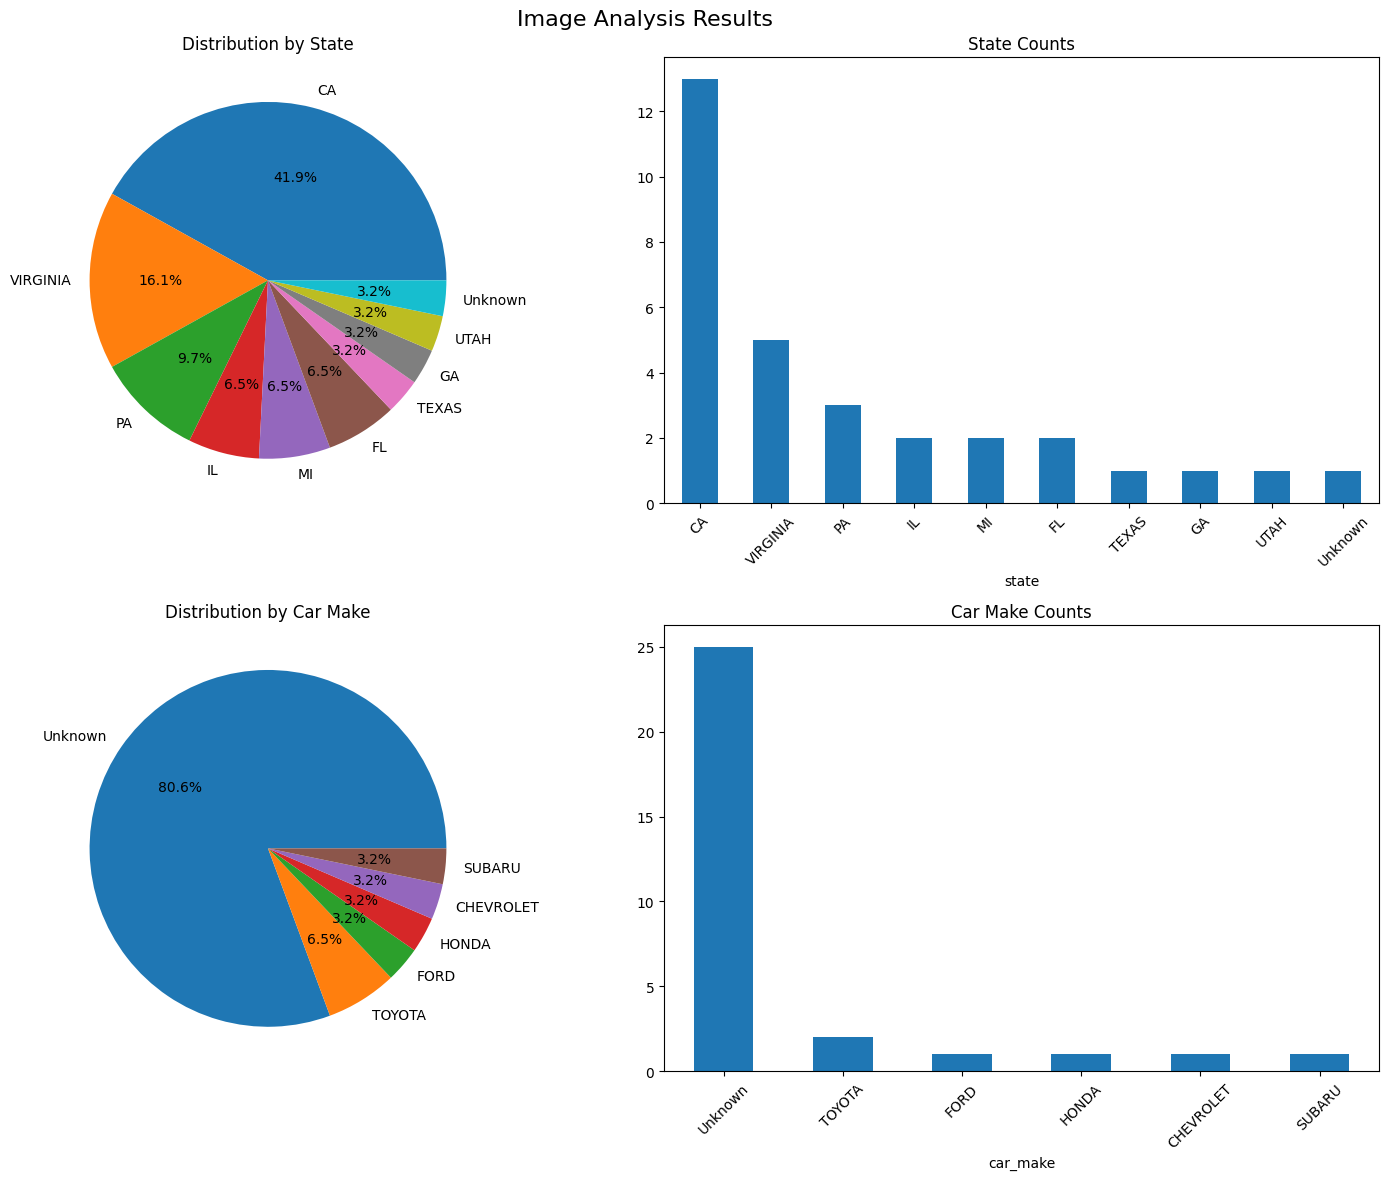

Uploaded Parquet: michael/AI/IMAGES_PROCESSED/image_analysis_20250806_125809.parquet
Uploaded Plot: michael/AI/IMAGES_PROCESSED/analysis_plots_20250806_125809.jpg

Processing complete! Files uploaded to S3.
Processed 31 images
Found 30 images with state info
Found 6 images with car make info


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import io
from datetime import datetime

results = []

for obj in response['Contents']:
    image_key = obj['Key']
    print(f"Processing: {image_key}")
    
    
    rekognition_response = rekognition_client.detect_text(
        Image={'S3Object': {'Bucket': BUCKET_NAME, 'Name': image_key}}
    )
    
    

    detected_texts = []
    for text_detection in rekognition_response['TextDetections']:
        if text_detection['Type'] == 'LINE':  # Get line-level text
            print(f"Detected text: {text_detection['DetectedText']}")
            detected_texts.append(text_detection['DetectedText'])
    
    state = None
    car_make = None
    
    for text in detected_texts:
        text_upper = text.upper()
        states = ['CA', 'NY', 'TX', 'FL', 'IL', 'PA', 'OH', 'GA', 'NC', 'MI', 
                 'CALIFORNIA', 'NEW YORK', 'TEXAS', 'FLORIDA', 'ILLINOIS', 'VIRGINIA', 'NORTH CAROLINA', 'MICHIGAN', 'MAINE', 'UTAH', ]
        for s in states:
            if s in text_upper:
                state = s
                break
        
        car_makes = ['TOYOTA', 'HONDA', 'FORD', 'CHEVROLET', 'NISSAN', 'BMW', 
                    'MERCEDES', 'AUDI', 'HYUNDAI', 'KIA', 'SUBARU']
        for make in car_makes:
            if make in text_upper:
                car_make = make
                break
    
    results.append({
        'image_path': image_key,
        'state': state if state else 'Unknown',
        'car_make': car_make if car_make else 'Unknown',
        'detected_text': ' | '.join(detected_texts)
    })

df = pd.DataFrame(results)
print("\nDataFrame created:")
print(df.head())

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Image Analysis Results', fontsize=16)

state_counts = df['state'].value_counts()
axes[0,0].pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribution by State')


state_counts.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('State Counts')
axes[0,1].tick_params(axis='x', rotation=45)


make_counts = df['car_make'].value_counts()
axes[1,0].pie(make_counts.values, labels=make_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Distribution by Car Make')


make_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Car Make Counts')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()


plot_filename = f'analysis_plots_{datetime.now().strftime("%Y%m%d_%H%M%S")}.jpg'
plt.savefig(plot_filename, format='jpg', dpi=300, bbox_inches='tight')
plt.show()


parquet_filename = f'image_analysis_{datetime.now().strftime("%Y%m%d_%H%M%S")}.parquet'
df.to_parquet(parquet_filename, index=False)


PROCESSED_PREFIX = f"{YOUR_NAME}/AI/IMAGES_PROCESSED/"

s3_client.upload_file(
    parquet_filename, 
    BUCKET_NAME, 
    f"{PROCESSED_PREFIX}{parquet_filename}"
)
print(f"Uploaded Parquet: {PROCESSED_PREFIX}{parquet_filename}")


s3_client.upload_file(
    plot_filename, 
    BUCKET_NAME, 
    f"{PROCESSED_PREFIX}{plot_filename}"
)
print(f"Uploaded Plot: {PROCESSED_PREFIX}{plot_filename}")

print("\nProcessing complete! Files uploaded to S3.")
print(f"Processed {len(df)} images")
print(f"Found {len(df[df['state'] != 'Unknown'])} images with state info")
print(f"Found {len(df[df['car_make'] != 'Unknown'])} images with car make info")